<div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 20px;">
    <div style="flex: 0 0 auto; margin-left: 0; margin-bottom: 0;">
        <img src="https://scidx.sci.utah.edu/wp-content/uploads/2024/12/logo-sm.png" alt="scidx Logo"/>
    </div>
    <div style="flex: 0 0 auto; margin-left: auto; margin-bottom: 0;">
        <img src="https://nairrpilot.org/app/site/media/ndp.jpg" alt="NDP Logo" width="200"/>
    </div>
</div>

# RAI Utah Hackathon: Exploring Data Streaming with SciDX_Streaming

Welcome to the RAI Utah Hackathon, where innovation meets real-world data! In this event, participants will harness the power of the SciDX_Streaming library to efficiently process and analyze diverse datasets from atmospheric and environmental sources. This notebook will provide a step by step guide to explore data streaming using Sci_DX_Streaming.

Using SciDX_Streaming, teams will dive into high-resolution weather and environmental datasets, including: 
 - https://horel.chpc.utah.edu/data/meop/level2/
 - https://horel.chpc.utah.edu/data/meop/level3/
 - https://horel.chpc.utah.edu/data/meop/data/

For more information on how SciDX_Streaming and POP system works please visit - <add_link_to_the_overview>


## Key Components
- Metadata registration: Setting Up Your Stream Before accessing data, you need to register your stream using the SciDX framework. This involves defining essential metadata—such as where the data is coming from, its structure, and format—so SciDX_Streaming knows how to handle it. Think of this as setting up the foundation for smooth data flow.

- Discovering, Filtering and Processing: Refining the Data Instead of working with raw, unprocessed data, SciDX_Streaming allows users to apply transformations and filters before consuming the stream. Whether it’s removing noise, selecting relevant segments, or optimizing data for analysis, this step ensures you're working with clean, meaningful information.

- Real-time data consumption: Streaming and Visualization Once the stream is registered and optimized, users can start consuming it in real time! With SciDX_Streaming, you can efficiently process and visualize data streams for insights—whether it's live weather conditions, oceanic observations, or environmental trends.

## Key Concepts

### Organizations
Organizations serve as logical groupings for resources and datasets:
- Act as containers for related datasets
- Help manage access control and permissions
- Enable better organization of data resources
- Allow team collaboration on datasets

### Three Types of Resources

1. Kafka Topics
   - For streaming data
   - Real-time data processing
   - Continuous data flows

2. S3 Links
   - For object storage
   - Large dataset management
   - Static file storage

3. URL Resources
   - External data sources
   - Web-accessible datasets
   - Supports multiple file types (CSV, JSON, TXT, NetCDF)

We will work with url resources in this notebook.

## Step 1: Setting Up the Clients

In this step, we will:
1. Import necessary modules for handling data streams.
2. Initialize the API or Kafka client to register and discover data streams.
3. Initialize the Streaming client to consume real-time data.

In [67]:
# Importing necessary modules
from scidx_streaming import StreamingClient
from pointofpresence import APIClient

Now we need to define the TOKEN, you can grab it from here: https://token.ndp.utah.edu
- If not already authenticated:
    - Select the `CILogon` button
    - Choose your institution from the Identity Provider list
    - Complete the institutional login process
    
- Upon successful authentication, you will be redirected to token.ndp.utah.edu
    
- Locate the `Access Token` field and copy the token value
    
- Replace `<your_token>` in the configuration below with your copied access token

In [ ]:
TOKEN=""

Here, we:
1. Initialize the `APIClient` to handle data registration and discovery.
2. Initialize the `StreamingClient` to handle real-time data streams.

In [69]:
# Initialize the POP client for data registration and discovery
API_URL = "155.101.6.191:8003"
client = APIClient(base_url=API_URL, token=TOKEN)

# Initialize the Streaming client for real-time data streaming
streaming = StreamingClient(client)
print(f"Streaming Client initialized. User ID: {streaming.user_id}")

Streaming Client initialized. User ID: fc624925-ef09-447d-bf16-378066799275


## Step 2: Registering your team name as Organization 

To register an organization, we use: 
- `client.register_organization(org_data)` for API-based and static file streams. 

Each registration requires defining metadata, which includes Basic information: 
- `name`: Unique identifier for the organization.
- `title`: A descriptive name for the organization.
- `description`: A description of the organization.

In [70]:
org_name = "sumaiya_test"

In [71]:
# Get the list of organizations
organizations = client.list_organizations(server="local")

# If the organization already exists, delete it
if org_name in organizations:
    print(f"Organization '{org_name}' already exists. Deleting it.")
    client.delete_organization(org_name,server="local")

# registering organization
org_data = {
    "name": org_name,
    "title": "sumaiya_test",
    "description": "Sumaiya test organization for testing purposes",
}

try:
    client.register_organization(org_data,server="local")
    print(f"Organization '{org_name}' registered successfully.")
except ValueError as e:
    print(e)

Organization 'sumaiya_test' registered successfully.


## Step 3: Registering your data stream (Data Provider) 

SciDX allows users to register data streams from different sources (e.g. CSV, TXT or JSON files). In this step, we will use the POP client, and the metadata for resgitsering an online CSV into our POP. 

### How registration works 

To register a data source, we use: 
- `client.register_url(metadata)` for API-based and static file streams. This method supports -
    - API streams: External APIs providing real-time or batch data. 
    - Static files: Pre-existing datasets hosted on a URL (CSV, TXT, JSON, NetCDF). 



Each registration requires defining metadata, which includes:

- `resource_name`: Unique identifier for the resource.
- `resource_title`: A descriptive name for the resource.
- `owner_org`: The ID of the CKAN organization registering the stream.
- `resource_url`: The API endpoint or static file URL.
- `file_type`: Type of file (CSV, TXT, JSON, NetCDF, or stream for real-time APIs).
- `notes`: Optional field for additional information.
- `extras`: Additional metadata such as authentication parameters or custom settings.
- `mapping`: Defines how specific fields from the stream or file should be extracted and renamed.In this case, only mapped fields will be shown.

And we can register it like this: `client.register_url(example_payload)`. 

Once registered, these streams can be discovered, filtered, and consumed dynamically. 

The following dataset looks like this -
| times               |     LAT |      LON |    ELV |   ROW |   COL |   GSP |   SP |   TT |   TRH |   PM1 |   PM2.5 |   PM4 |   PM10 |   PRHI |    O3 |   PMF |   O3F |   GPF |   SPF |   MOB |
|:--------------------|--------:|---------:|-------:|------:|------:|------:|-----:|-----:|------:|------:|--------:|------:|-------:|-------:|------:|------:|------:|------:|------:|------:|
| 2021-09-28 16:47:00 | 40.7698 | -111.85  |  163.8 |    64 |    70 |   nan |  1.1 | 22.9 |  23.7 |   nan |     5   |   nan |    nan |   27   | nan   |     0 |     0 |     0 |     4 |    11 |
| 2021-09-28 16:48:00 | 40.7663 | -111.848 | 1475.1 |    63 |    70 |   nan |  0.2 | 22.9 |  23.6 |   nan |     5   |   nan |    nan |   27   | nan   |     0 |     0 |     0 |     8 |     9 |
| 2021-09-28 16:48:00 | 40.7698 | -111.851 |  164.1 |    64 |    70 |   nan |  0.6 | 22.9 |  23.7 |   nan |     5   |   nan |    nan |   27   | nan   |     0 |     0 |     0 |     2 |     2 |
| 2021-09-28 16:49:00 | 40.7662 | -111.848 | 1475.8 |    63 |    70 |   nan |  0.3 | 23   |  23.5 |   nan |     5   |   nan |    nan |   27   |  33.2 |     0 |     0 |     0 |     9 |    10 |
| 2021-09-28 16:50:00 | 40.7662 | -111.848 | 1475.7 |    63 |    70 |   nan |  0.2 | 23   |  23.5 |   nan |     5   |   nan |    nan |   27   |  33.3 |     0 |     0 |     0 |    12 |    12 |

`mapping` section works as following-
- Column `ELV` is renamed as `elevation`

In [72]:
resource_name = "sumayia_test"

In [76]:
number_of_datasets_found = client.search_datasets(resource_name,server="local")

if len(number_of_datasets_found) > 0:
    print(f"Resource '{resource_name}' already exists. Deleting it.")
    client.delete_resource_by_name(resource_name,server="local")

# Register the CSV data with the POP client
csv_metadata = {
    "resource_name": resource_name,
    "resource_title": "ebus_min_2021_09",
    "owner_org": org_name,
    "resource_url": "https://horel.chpc.utah.edu/data/meop/level3/ebus_2021/ebus_min_2021_09.csv",
    "file_type": "CSV",
    "notes": "Some additional notes about the resource.",
    "mapping": {
        "elevation":"ELV",
        "ozone_concentration":"O3"
    }
}

try:
    client.register_url(csv_metadata,server="local")
    print(f"Resource '{resource_name}' registered successfully.")
except ValueError as e:
    print(e)

Resource 'sumayia_test' registered successfully.


## Step 4: Discovering registered data sources (Data Provider)

Now that we have registered the different data sources, we will: 
1. Use the POP client to search for datasets using the `search_datasets` method.
2. Verify that the registered data stream is correctly stored and available for discovery.
3. Confirm metadaa accuracy before data consumption.

This ensures the dataset is discoverable for use by the Data Consumers.

In [77]:
# Search for the registered Earthscope data stream
search_results = client.search_datasets(resource_name, server="local")
print(f"Number of datasets found: {len(search_results)}")

Number of datasets found: 1


# Transition: From Data Provider to Data Consumer 

At this point, the POP client (Data Provider) has completed its role in: 
1. Registering the data source metadata.
2. Verifying its discoverability.

Now, we transition to the Streaming client (Data Consumer) to: 
1. Discover and apply filters to the registered data sources to create a custom data stream.
2. Subscribe to and consume the custom data stream in real-time.
3. Process and visualize the incoming data dynamically.

However, while we are streaming data from the same client that registered it, this process does not require using the same client. By allowing different clients to access and consume registered data, this framework provides flexibility for external consumers to interact with data seamlessly, regardless of the original registration source.

## Step 5: Create a Data Stream with filtered Data Sources (Data Consumer) 

The `create_kafka_stream` function searches for datasets matching the provided keywords, applies filtering semantics, and creates a real-time Kafka stream for consumption. 

#### Function parameters 

- `keywords`: List of keywords to filter relevant datasets.
- `filter_semantics`: Optional, defines filtering criteria for datasets.
- `match_all`: Optional, if True only data sources with all the keywords will be selected.
- `username`: Optional username for authentication in protected data sources.
- `password`: Optional password for authentication in protected data sources.

### Filtering capabilities & Logic

SciDX provides a powerful filtering system that allows users to refine their data streams by applying custom filtering conditions before consuming them. These filters enable real-time data selection based on specific rules, comparisons, and logical expressions. 


### How filters modify Data Streams

SciDX does not remove rows from the data stream by default. Instead: 
- If a row does not meet the filtering criteria, its affected column values are set to `null`.
- All rows are still sent, even if they contain `null` values.


### Supported filtering methods

The filtering capabilities allow us to refine the data stream by applying conditions, alerts, and transformations.

| **Type**                    | **Description**                                      | **Example**                                  |
|-----------------------------|--------------------------------------------------|----------------------------------------------|
| **Column comparisons**       | Compare values between different columns        | `x > y`                                     |
| **Mathematical operations**  | Apply arithmetic operations (+, -, *, /) to compare column values       | `x > 10 * y`                                |
| **IN operator**              | Check if a column value exists in a predefined list   | `alert IN ['High', 'Critical', 'Warning']`                     |
| **Conditional logic (IF-THEN-ELSE)** | Apply rules based on conditions of column value        | `IF x > 20 THEN alert = High ELSE alert = Low`   |
| **Conditional logic (IF only)** | Apply rules based on conditions of column value        | `IF x > 20 THEN alert = High ELSE alert = Low`   |
| **Logical operators (OR)** | Combine multiple conditions                 | `IF x > 10 OR z = 20 THEN alert = High` |
| **Logical operators (AND)** | Combine multiple conditions                 | `IF x > 10 AND z = 20 THEN alert = High` |
| **Window-based filtering**   | Aggregate functions over sliding time windows  | `IF window_filter(9, sum, x > 20) THEN alert = High` |

---


In [79]:
# Create a Kafka stream for the registered data with filters applied
filters = [
    "IF ozone_concentration > 30 THEN alert = HIGH ELSE alert = LOW"
]

# Create a Kafka stream for Earthscope data with filters applied
stream = await streaming.create_kafka_stream(
    keywords=[resource_name],
    match_all=True,
    filter_semantics=filters
)

# Retrieve the stream's topic name
topic = stream.data_stream_id
print(f"Stream created: {topic}")

Stream created: data_stream_fc624925-ef09-447d-bf16-378066799275_3


## Step 6: Consuming the filtered data stream 

Now that we have successfully created a filtered Kafka data stream, we transition to real-time data consumption. This step involves: 
1. Initializing a kafka consumer: Passing the data stream topic to the `consume_kafka_messages` function.
2. Listening for incoming messages: Continuously receiving new filtered data in real-time.
3. Processing and updating the data dynamically: Messages are appended to a DataFrame for analysis or visualization.

**Note**: It may take a few seconds for data to populate due to real-time processing.

In [80]:
# Start consuming the filtered Kafka stream
consumer = streaming.consume_kafka_messages(topic)

In [81]:
# Get the data from the consumer
df=consumer.dataframe

In [82]:
# Import necessary modules to visualize the data
import pandas as pd

df = pd.DataFrame(df)
df = pd.DataFrame(df.iloc[0].to_dict())
df.reset_index(drop=True, inplace=True)

print(df)

     elevation  ozone_concentration alert
0        163.8                  NaN   LOW
1       1475.1                  NaN   LOW
2        164.1                  NaN   LOW
3       1475.8                 33.2  HIGH
4       1475.7                 33.3  HIGH
..         ...                  ...   ...
287     1472.0                 28.6   LOW
288     1472.6                 29.4   LOW
289     1469.8                 30.9  HIGH
290     1470.3                 30.1  HIGH
291     1472.4                 31.6  HIGH

[292 rows x 3 columns]


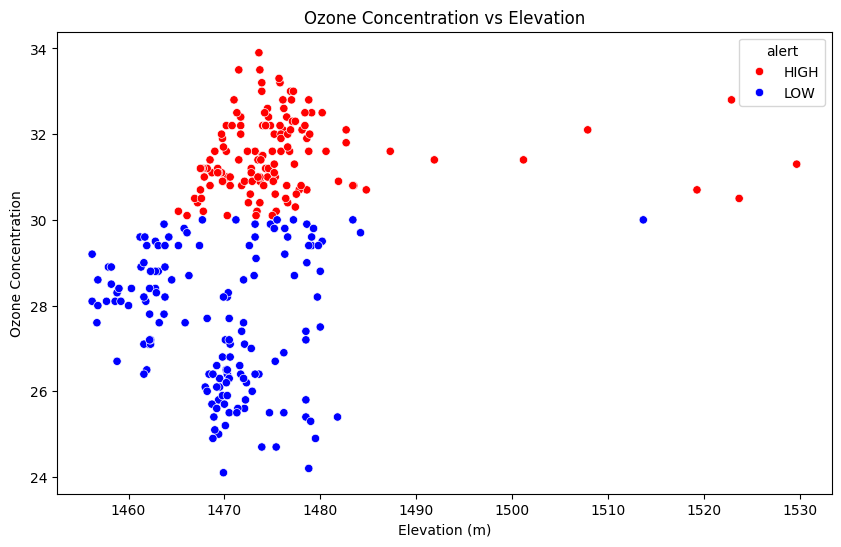

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure NaN values in ozone_concentration are handled
df = df.dropna(subset=['ozone_concentration'])

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='elevation', y='ozone_concentration', hue='alert', palette={'LOW': 'blue', 'HIGH': 'red'})

# Labels and title
plt.xlabel('Elevation (m)')
plt.ylabel('Ozone Concentration')
plt.title('Ozone Concentration vs Elevation')

# Show the plot
plt.show()



## Step 7: Stopping data consumption and Cleaning up 

Once the data stream has been consumed and analyzed, we can clean up resources to prevent unnecessary background processes and free up system resources. This step involves:
1. Stopping the kafka consumer: Ensures that the data stream halts processing.
2. Deleting the created kafka stream: Removes the created data stream from the Kafka topic using the Streaming client.
3. Deleting the registered data source: Cleans up the metadata registration from the POP client.
4. Deleting the registered organization: Cleans up the organization from the POP client.

In [84]:
# Stop the Kafka consumer
consumer.stop()

# Delete the Kafka stream
try:
    response=await streaming.delete_stream(stream)
    message=response["message"]
    print(f"Message: {message}")
except ValueError as e:
    print(e)

Message: Stream 'data_stream_fc624925-ef09-447d-bf16-378066799275_3' deleted successfully


In [85]:
# Delete the registered dataset from the POP system
try:
    response=client.delete_resource_by_id(resource_name, server="local")
    message=response["message"]
    print(f"Message: {message}")
except ValueError as e:
    print(e)

Message: sumayia_test deleted successfully


In [86]:
# Delete the registered organization from the POP system
try:
    response=client.delete_organization(org_name, server="local")
    message=response["message"]
    print(f"Message: {message}")
except ValueError as e:
    print(e)

Message: Organization deleted successfully
